In [684]:
from datetime import datetime
import pandas as pd 

col_names = [ 'position', 'const', 'created', 'modified'
            , 'description' , 'title', 'title_type'
            , 'directors', 'rating' ,'runtime_in_min' 
            , 'year','genres', 'votes_cnt','release_date', 'URL'    
             ]
newdf     = pd.DataFrame()
for i in range(1996,2016):
 
        dfx            = pd.read_table (str('data/IMDb Top 250 '+str(i)+'.csv')
                                      , sep = ','
                                      , na_values = ""
                                      , header    = 0            #ignore header
                          #            , index_col = 0            #user rowid as index
                                      , names     = col_names
                               
                                       )
        dfx['dat_per'] = i
        newdf          =  newdf.append(dfx) 

print(newdf.shape)

var_cols = [ 'dat_per', 'position', 'const' 
            , 'title', 'title_type' , 'description' 
            , 'directors', 'rating' ,'runtime_in_min' 
            , 'year','genres', 'votes_cnt','release_date', 'URL'    
             ]
newdf.tail(3)
          

(5002, 16)


,position,const,created,modified,description,title,title_type,directors,rating,runtime_in_min,year,genres,votes_cnt,release_date,URL,dat_per
247,248,tt0049406,Mon Feb 8 13:56:07 2016,Mon Feb 8 13:56:07 2016,NaN,The Killing,Feature Film,Stanley Kubrick,8.0,85.0,1956.0,"crime, drama, film_noir, thriller",62072.0,1956-05-20,http://www.imdb.com/title/tt0049406/,2015
248,249,tt0118694,Mon Feb 8 13:56:07 2016,Mon Feb 8 13:56:07 2016,NaN,In the Mood for Love,Feature Film,Kar Wai Wong,8.1,98.0,2000.0,"drama, romance",75293.0,2000-05-20,http://www.imdb.com/title/tt0118694/,2015
249,250,tt0061722,Mon Feb 8 13:56:07 2016,Mon Feb 8 13:56:07 2016,NaN,The Graduate,Feature Film,Mike Nichols,8.0,106.0,1967.0,"comedy, drama, romance",210346.0,1967-12-21,http://www.imdb.com/title/tt0061722/,2015


In [384]:
newdf.set_index(['const', 'dat_per'], inplace = True)
newdf.sort_index( inplace = True)

In [442]:
data = newdf
data.reset_index(inplace = True)
X =(data.set_index(['const','year'])
        .genres.str.split(',\s*', expand=True)
        .stack()
        .reset_index()
        .pivot_table(index=['const','year'], columns=0, fill_value=0, aggfunc='size')
)
X.describe()

# Place the DataFrames side by side
genres_total     =  X.sum(axis = 1, skipna = True) 
horizontal_stack = pd.concat([X, genres_total,], axis=1)
horizontal_stack.rename(columns={0: "genres_cnt"}, inplace = True )

const_genre = horizontal_stack.groupby('const').min()
const_genre.head()



,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,music,musical,mystery,romance,sci_fi,sport,thriller,war,western,genres_cnt
const,,,,,,,,,,,,,,,,,,,,,
tt0010323,0,0,0,0,0,0,0,0,0,3,...,0,0,3,0,0,0,3,0,0,12
tt0012349,0,0,0,0,8,0,0,8,8,0,...,0,0,0,0,0,0,0,0,0,24
tt0013442,0,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,24
tt0014429,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
tt0015324,2,0,0,0,2,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,6


In [420]:
data.loc[0:2, ('const','title', 'dat_per')]

,const,title,dat_per
0,tt0010323,The Cabinet of Dr. Caligari,2005
1,tt0010323,The Cabinet of Dr. Caligari,2006
2,tt0010323,The Cabinet of Dr. Caligari,2007


In [439]:
var_list = ('const','title', 'dat_per', 'title_type')
#D = newdf.loc[:,('const','title', 'dat_per', 'title_type')]
D = newdf.loc[:, var_list]
D.head()
pd.get_dummies(D, columns=['title_type']).head(3)

,const,title,dat_per,title_type_Documentary,title_type_Feature Film,title_type_Short Film,title_type_TV Movie
0,tt0010323,The Cabinet of Dr. Caligari,2005,0,1,0,0
1,tt0010323,The Cabinet of Dr. Caligari,2006,0,1,0,0
2,tt0010323,The Cabinet of Dr. Caligari,2007,0,1,0,0


In [457]:
X =(data.set_index(['const','year'])
        .genres.str.split(',\s*', expand=True)
        .stack()
        .reset_index()
        .pivot_table(index=['const','year'], columns=0, fill_value=0, aggfunc='size')
)
X.head()

genres_total     =  X.sum(axis = 1, skipna = True) 
XX               = pd.concat([X, genres_total,], axis=1)
XX.head(10).unstack()

#result = df.groupby(['ID']).agg({'TIME': 'mean', 'ID': 'count'})
#           .rename(columns={'ID':'COUNT','TIME':'MEAN_TIME'})
#           .reset_index()


action                                                  adventure  \
year      1920.0 1921.0 1922.0 1923.0 1924.0 1925.0 1926.0 1927.0    1920.0   
const                                                                         
tt0010323    0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN       0.0   
tt0012349    NaN    0.0    NaN    NaN    NaN    NaN    NaN    NaN       NaN   
tt0013442    NaN    NaN    0.0    NaN    NaN    NaN    NaN    NaN       NaN   
tt0014429    NaN    NaN    NaN    0.0    NaN    NaN    NaN    NaN       NaN   
tt0015324    NaN    NaN    NaN    NaN    2.0    NaN    NaN    NaN       NaN   
tt0015648    NaN    NaN    NaN    NaN    NaN    0.0    NaN    NaN       NaN   
tt0015864    NaN    NaN    NaN    NaN    NaN    0.0    NaN    NaN       NaN   
tt0017136    NaN    NaN    NaN    NaN    NaN    NaN    NaN    0.0       NaN   
tt0017925    NaN    NaN    NaN    NaN    NaN    NaN   17.0    NaN       NaN   
tt0018455    NaN    NaN    NaN    NaN    NaN    NaN    NaN    0.0       NaN   

                  ...   western             0                              \
year      1921.0  ...    1926.0 1927.0 1920.0 1921.0 1922.0 1923.0 1924.0   
const             ...                                                       
tt0010323    NaN  ...       NaN    NaN   12.0    NaN    NaN    NaN    NaN   
tt0012349    0.0  ...       NaN    NaN    NaN   24.0    NaN    NaN    NaN   
tt0013442    NaN  ...       NaN    NaN    NaN    NaN   24.0    NaN    NaN   
tt0014429    NaN  ...       NaN    NaN    NaN    NaN    NaN    2.0    NaN   
tt0015324    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN    6.0   
tt0015648    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
tt0015864    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
tt0017136    NaN  ...       NaN    0.0    NaN    NaN    NaN    NaN    NaN   
tt0017925    NaN  ...       0.0    NaN    NaN    NaN    NaN    NaN    NaN   
tt0018455    NaN  ...       NaN    0.0    NaN    NaN    NaN    NaN    NaN   

                                
year      1925.0 1926.0 1927.0  
const                           
tt0010323    NaN    NaN    NaN  
tt0012349    NaN    NaN    NaN  
tt0013442    NaN    NaN    NaN  
tt0014429    NaN    NaN    NaN  
tt0015324    NaN    NaN    NaN  
tt0015648   24.0    NaN    NaN  
tt0015864   60.0    NaN    NaN  
tt0017136    NaN    NaN   40.0  
tt0017925    NaN   85.0    NaN  
tt0018455    NaN    NaN   14.0  

[10 rows x 184 columns]

In [463]:
newdf.pivot_table(  values ='rating'
                  , index  =('const', 'dat_per')
                  , columns='title_type'
                 ).head()

title_type         Documentary  Feature Film  Short Film  TV Movie
const     dat_per                                                 
tt0010323 2005             NaN           8.1         NaN       NaN
          2006             NaN           8.1         NaN       NaN
          2007             NaN           8.1         NaN       NaN
tt0012349 2008             NaN           8.3         NaN       NaN
          2009             NaN           8.3         NaN       NaN

In [579]:
A = (newdf.set_index(['const','dat_per'])
                .genres.str.split(',\s*', expand=True)
                .stack()
                .reset_index()        
    )

A.rename(columns={0:'genre'}, inplace = True)
A= A.assign(n = 1)  
A.head() 
 
B= A.pivot_table(   values =  'n'
                  , index  = ('const', 'dat_per')
                  , columns= ('genre' )
                  , fill_value=0
                 ) 

B= B.reset_index() 

C = pd.merge(  data 
                 , B
                 , how='left'
                 , left_on = ('const', 'dat_per')
                 , right_on = ('const', 'dat_per'))

col_names = ['const','dat_per','title','genre', 'romance', 'drama', 'comedy', 'horror']
C.loc[C.const== 'tt0012349', col_names]
#B.loc[B.const== 'tt0012349', :]

,const,dat_per,title,genre,romance,drama,comedy,horror
3204,tt0012349,2008,The Kid,NaN,0.0,1.0,1.0,0.0
3444,tt0012349,2009,The Kid,NaN,0.0,1.0,1.0,0.0
3671,tt0012349,2010,The Kid,NaN,0.0,1.0,1.0,0.0
3902,tt0012349,2011,The Kid,NaN,0.0,1.0,1.0,0.0
4129,tt0012349,2012,The Kid,NaN,0.0,1.0,1.0,0.0
4362,tt0012349,2013,The Kid,NaN,0.0,1.0,1.0,0.0
4600,tt0012349,2014,The Kid,NaN,0.0,1.0,1.0,0.0
4847,tt0012349,2015,The Kid,NaN,0.0,1.0,1.0,0.0


In [582]:
#B.loc[B.duplicated(keep ='first'),:]
#B.drop_duplicates(keep= 'first').shape
B.head()
#B.drop_duplicates(subset=['const', 'drama'], keep = 'first').shape
B.loc[B.duplicated(keep = 'first'), ['const', 'drama']].shape
B.loc[B.duplicated , ['const', 'drama']].shape

(0, 2)

In [681]:
data.title_type.value_counts(normalize = True) # percentage
data.groupby(['dat_per', 'title_type']).rating.mean()
data.pivot_table(   values =  'rating'
                  , index  = ('dat_per')
                  , columns= ('title_type' )
                  , fill_value=0
                 ).head() 

title_type,Documentary,Feature Film,Short Film,TV Movie
dat_per,,,,
1996,8.3,7.893443,8.133333,6.6
1997,8.3,8.000816,8.133333,0.0
1998,0.0,8.050813,8.133333,0.0
1999,0.0,8.140741,8.166667,8.4
2000,0.0,8.154733,8.300000,8.4


In [687]:
data = newdf.copy()
data.created      = pd.to_datetime(data.created)
data.modified     = pd.to_datetime(data.modified)
data.release_date = pd.to_datetime(data.release_date)
 
data.isnull().sum()  # True =1, False = 0
data.drop('description', axis = 1, inplace= True) #drop column
data.dropna(axis =0, how ='any', inplace= True)   #drop rows
#data.loc[0:2, ('const','title', 'dat_per')]

data.head(3)

# data[data.directors == 'Federico Fellini'].loc[:,('dat_per','title')].head()


,position,const,created,modified,title,title_type,directors,rating,runtime_in_min,year,genres,votes_cnt,release_date,URL,dat_per
0,1,tt0076759,2014-04-07 15:53:50,2014-04-07 15:53:50,Star Wars: Episode IV - A New Hope,Feature Film,George Lucas,8.7,121.0,1977.0,"action, adventure, fantasy, sci_fi",906053.0,1977-05-25,http://www.imdb.com/title/tt0076759/,1996
1,2,tt0111161,2014-04-07 15:53:50,2014-04-07 15:53:50,The Shawshank Redemption,Feature Film,Frank Darabont,9.3,142.0,1994.0,"crime, drama",1680671.0,1994-09-10,http://www.imdb.com/title/tt0111161/,1996
2,3,tt0117951,2014-04-07 15:53:51,2014-04-07 15:53:51,Trainspotting,Feature Film,Danny Boyle,8.2,94.0,1996.0,drama,466802.0,1996-02-23,http://www.imdb.com/title/tt0117951/,1996


In [697]:
data.directors.value_counts()

Alfred Hitchcock                 185
Stanley Kubrick                  157
Steven Spielberg                 115
Billy Wilder                     114
Akira Kurosawa                    96
Martin Scorsese                   88
Sergio Leone                      75
Frank Capra                       72
Quentin Tarantino                 71
James Cameron                     65
John Huston                       62
Ridley Scott                      58
Charles Chaplin                   58
Hayao Miyazaki                    56
Christopher Nolan                 56
John Ford                         56
Sidney Lumet                      55
Rob Reiner                        54
Clint Eastwood                    54
William Wyler                     54
Francis Ford Coppola              53
Joel Coen                         53
Ingmar Bergman                    52
David Lean                        51
Peter Jackson                     50
Howard Hawks                      49
Federico Fellini                  45
D

In [661]:
data.title.str.contains('Good').value_counts()

False    4940
True       60
Name: title, dtype: int64

In [600]:
data.shape

(5002, 16)

In [408]:
data.info()
const_genre.info()
const_genre.reset_index(inplace = True)
const_genre.set_index(['const'], inplace = True)

const_genre.index.name
       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 18 columns):
level_0           5002 non-null int64
index             5002 non-null int64
const             5000 non-null object
dat_per           5002 non-null int64
position          5002 non-null object
created           5000 non-null object
modified          5000 non-null object
description       0 non-null float64
title             5000 non-null object
title_type        5000 non-null object
directors         4970 non-null object
rating            5000 non-null float64
runtime_in_min    5000 non-null float64
year              5000 non-null float64
genres            5000 non-null object
votes_cnt         5000 non-null float64
release_date      5000 non-null object
URL               5000 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 703.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 671 entries, tt0010323 to tt3659388
Data columns (total 23 columns):
action       

'const'

In [103]:
import pandas as pd
pd.__version__

'0.20.1'

In [120]:
data = pd.read_csv ('data/IMDb Top 250 1996.csv' , index_col = 'const')
data.head()

data.loc['tt0111161', 'IMDb Rating']
data.iloc[2, 6]

'Danny Boyle'

In [370]:
data = newdf
X =(data.set_index(['const','year'])
       .genres.str.split(',\s*', expand=True)
       .stack()
       .reset_index()
       .pivot_table(index=['const','year'], columns=0, fill_value=0, aggfunc='size')
)
X.describe()
# Stack the Dapd.merge(  data
                 , const_genre
                 , how='left'
                 , left_on = 'const', right_on = 'const')taFrames on top of each other
# vertical_stack = pd.concat([vertical_stack, df], axis=0)

# Place the DataFrames side by side
genres_total =  X.sum(axis = 1, skipna = True) 
horizontal_stack = pd.concat([X, genres_total,], axis=1)
horizontal_stack.rename(columns={0: "genres_cnt"}, inplace = True )
 
X.sum(axis = 0, skipna = True)
horizontal_stack.head()
  
const_genre = horizontal_stack.groupby('const').min()
#const_genre.index.rename('constx', inplace = True)
const_genre.head()
 
const_genre.info()
#data.set_index('const')

pd.merge(  data
                 , const_genre
                 , how='left'
                 , left_on = 'const', right_on = 'const')


KeyError: 'const'

In [342]:
const_genre.loc['tt0111161']


TypeError: 'method' object is not subscriptable

In [159]:
data = pd.read_csv ('data/IMDb Top 250 1996.csv' , index_col = 'const')
data.isnull().head()
data.notnull().head()
#data.dropna().head()
#data.fillna(value="nix da").head()
#data.isna().head()
data.drop(["tt0111161"], axis=0).head(2)


,position,created,modified,description,Title,Title type,Directors,IMDb Rating,Runtime (mins),Year,Genres,Num. Votes,Release Date (month/day/year),URL
const,,,,,,,,,,,,,,
tt0076759,1,Mon Apr 7 15:53:50 2014,Mon Apr 7 15:53:50 2014,NaN,Star Wars: Episode IV - A New Hope,Feature Film,George Lucas,8.7,121,1977,"action, adventure, fantasy, sci_fi",906053,1977-05-25,http://www.imdb.com/title/tt0076759/
tt0117951,3,Mon Apr 7 15:53:51 2014,Mon Apr 7 15:53:51 2014,NaN,Trainspotting,Feature Film,Danny Boyle,8.2,94,1996,drama,466802,1996-02-23,http://www.imdb.com/title/tt0117951/


In [156]:
data = pd.read_csv ('data/IMDb Top 250 1996.csv' , index_col = 'const')
data.info()
sorted(data['Title type'].unique())
data['Title type'] = data['Title type'].astype('category')
data['Title type'].head()
data['Title type'].cat.codes.head()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, tt0076759 to tt0049730
Data columns (total 14 columns):
position                         250 non-null int64
created                          250 non-null object
modified                         250 non-null object
description                      0 non-null float64
Title                            250 non-null object
Title type                       250 non-null object
Directors                        249 non-null object
IMDb Rating                      250 non-null float64
Runtime (mins)                   250 non-null int64
Year                             250 non-null int64
Genres                           250 non-null object
Num. Votes                       250 non-null int64
Release Date (month/day/year)    250 non-null object
URL                              250 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 29.3+ KB


const
tt0076759    1
tt0111161    1
tt0117951    1
tt0114814    1
tt0108598    2
dtype: int8

In [161]:
data = pd.read_csv ('data/IMDb Top 250 1996.csv' , index_col = 'const')
pd.to_datetime(df['created'])

NameError: name 'df' is not defined

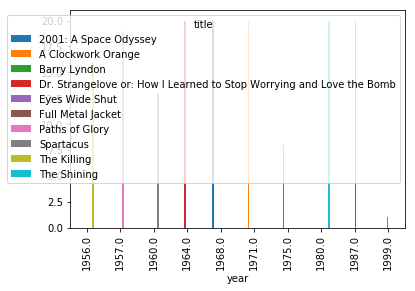

In [88]:
 
newdf.groupby('dat_per').rating.agg(['count', 'min', 'max', 'mean'])
newdf.genres.value_counts()
newdf.genres.nunique()
pd.crosstab(newdf.genres, newdf.dat_per).head(3)

%matplotlib inline
pd.crosstab(  newdf[newdf.directors == 'Stanley Kubrick'].year
            , newdf[newdf.directors == 'Stanley Kubrick'].title 
            ).plot(kind= 'bar')